![Logo](https://github.com/alqmase/optimization-algorithms/blob/main/img/home/logo.png) 
![Logo](img/home/logo.png) 

## Introduction
Optimization-algorithms is a Python library that contains useful algorithms for several complex problems such as partitioning, floor planning, scheduling. This library will provide many implementations for many optimization algorithms. This library is organized in a problem-wise structure. For example, there are many problems such as graph partitioning problem, scheduling problem, etc. For each problem, there are many algorithms to solve it. For each algorithm, there are many possible approaches to implement it. For more information please visit [**Project Repository** by clicking this link ](https://github.com/alqmase/optimization-algorithms)

## structure  
![problems-hierarchy](https://github.com/alqmase/optimization-algorithms/blob/main/img/home/problems-hierarchy.png)
![problems-hierarchy](img/home/problems-hierarchy.png)

## Q1: how this library can be installed?
Use the package manager pip to install optimization-algorithms.

In [3]:
!pip install optimization-algorithms

## Import the required libraries for this tutorial
In the first step, we will import the optimization-algorithms library for partitioning problem where three algorithms for bi-partitioning will be imported. The following code show how these algorithms can be imported.

In [7]:
from optimization_algorithms.for_partitioning import kernighan_lin_0101, simulated_annealing_0102, hybridization_SA_KL_0103
import networkx as nx

## Q2: how this library can be used?
To show how the optimization-algorithms library can be used for partitioning problem, we need a dataset.  In this case, we will use two-dimensional grid graph to show how this library can be used for portioning problem.  In the grid graph, each node connected to its four nearest neighbors. To generate the grid graph, we implement the following function:

In [8]:
def generate_grid_2d_graph_dataset(grid_size):
    cols=[(i * grid_size + j, i * grid_size + j+1)  for i in range(grid_size) for j in range(grid_size-1)]
    rows=[(j * grid_size + i, j * grid_size + i + grid_size)  for i in range(grid_size) for j in range(grid_size-1)]
    edgeList=cols+rows
    return  nx.Graph(edgeList)

The following code shows how 4X4 grid graph can be generated.

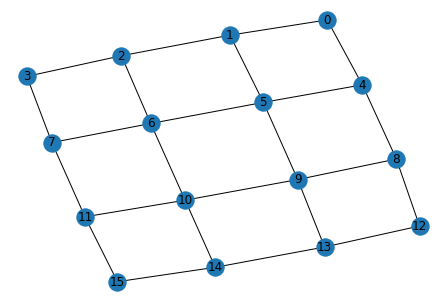

In [9]:
G=generate_grid_2d_graph_dataset(4)
nx.draw(G, with_labels=True)

The following code shows how 10X10 grid graph can be generated.

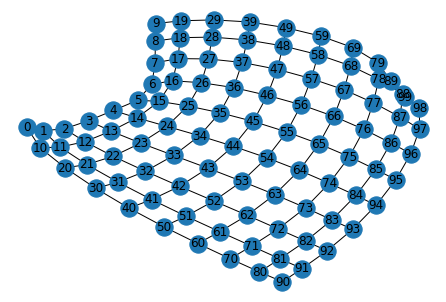

In [17]:
G=generate_grid_2d_graph_dataset(10)
nx.draw(G, with_labels=True)

In the first step, we will create the test dataset as 100X100 grid graph using the following code

In [18]:
G=generate_grid_2d_graph_dataset(100)

The following code shows how 100X100 grid graph can be partitioning using Kernighan-Lin (KL) with the default parameters.

In [19]:
KL=kernighan_lin_0101(G)


-------Result Summary---------
initial cost-cut :             9920                
Best cost-cut :                143                 
Running Time in Second :       49.1


The best partitions can be obtained by the following function:

In [20]:
partitions=KL.get_best_partitions()

The following code shows how 100X100 grid graph can be partitioning using Simulated Annealing algorithm (SA) with the default parameters.

In [21]:
SA=simulated_annealing_0102(G)


-------Result Summary---------
initial cost-cut :             9948                
Best cost-cut :                4594                
Running Time in Second :       3.2


The best partitions can be obtained by the following function:

In [22]:
partitions=SA.get_best_partitions()

The following code shows how 100X100 grid graph can be partitioning using Hybridization SA&KL algorithm with the default parameters.

In [23]:
SA_KL = hybridization_SA_KL_0103(G)


-------Result Summary---------
initial cost-cut :             9930                
Best cost-cut :                121                 
Running Time in Second :       36.1


The best partitions can be obtained by the following function:

In [24]:
partitions= SA_KL.get_best_partitions()

To create initial partitions and pass it as parameter, in this example, we may create the initial partitions as even partition and odd partition where the nodes with even labels will be in one partition, and the nodes with odd labels will be in another partition. The following function can help generate the initial partition.

In [25]:
def create_initial_partitions(G):
    even=[i for i in G.nodes if i%2 == 0]
    odd =[i for i in G.nodes if i%2 == 1]
    return [even, odd]

The following code is used to prepare the `initial_partitons` parameters.

In [27]:
initial_partitions=create_initial_partitions(G)

Now, we can pass this parameter to the three algorithms. 

In [28]:
KL=kernighan_lin_0101(G, initial_partitions)


-------Result Summary---------
initial cost-cut :             9900                
Best cost-cut :                111                 
Running Time in Second :       60.5


In [29]:
SA=simulated_annealing_0102(G, initial_partitions)


-------Result Summary---------
initial cost-cut :             9900                
Best cost-cut :                4785                
Running Time in Second :       3.1


In [30]:
SA_KL = hybridization_SA_KL_0103(G, initial_partitions)


-------Result Summary---------
initial cost-cut :             9900                
Best cost-cut :                123                 
Running Time in Second :       36.8


The following code shows how to play with algorithm-specific parameters such as cooling-rate and temperature parameters of simulated annealing algorithm and hybridization SA-KL algorithm. 

In [31]:
Attrs={'cooling_rate':0.001, 'temperature':1000}

In [32]:
SA=simulated_annealing_0102(G, initial_partitions, Attrs)


-------Result Summary---------
initial cost-cut :             9900                
Best cost-cut :                9427                
Running Time in Second :       0.3


In [33]:
SA_KL = hybridization_SA_KL_0103(G, initial_partitions, Attrs)


-------Result Summary---------
initial cost-cut :             9900                
Best cost-cut :                100                 
Running Time in Second :       46.9


There are some Tips in using parameters. Simulate annealing and hybridization are different algorithm. It is better to examine each one with different values of the cooling rate and temperature parameters. The hybridization algorithm requires only small values. For Kernighan-Lin algorithm, there are some useful functions that allow user to obtain some useful information. The following shows those functions.

In [34]:
KL.get_number_of_iterations()

19

We can notice that the number of iterations by KL for the given dataset is 19.

In [35]:
KL.get_cost_per_iterations()

[9900,
 3154,
 2900,
 2836,
 2436,
 2100,
 1900,
 1700,
 1500,
 1300,
 1100,
 1002,
 700,
 602,
 237,
 154,
 135,
 111,
 111]